# It is your turn to build regression models (linear regression and decision tree/forests)

- use the workflow in linear_regression_workflow.ipynb to develop a predictive L2 model for the diabetes dataset (loaded below)
- use the workflow in linear_regression_workflow.ipynb to develop a predictive L1 model for the diabetes dataset 
- use the example developed in dtrees.ipynb to build a decision tree classifier for the diabetes dataset. Visualize the best tree you built with graphvix (pip install graphviz)
- now build a random forest classifier for the diabetes dataset. Construct a feature importance plot for this dataset. See the sklearn documentation example to see how to plot feature importance of a forest.

# Problem 1: Load all the necessary packages to do regularized linear regression and decision tree learning (5 points)
- fill in the other import lines in the cell below.

In [3]:
from sklearn import datasets
from sklearn.datasets import load_diabetes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import plot_tree, DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Load the diabetes dataset

In [4]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
print(X.shape,y.shape)
print(diabetes.DESCR)

(442, 10) (442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of th

# Build the best L2 regularized model for the diabetes dataset (20 points)
- load the diabetes dataset
- set up a pipeline of polynomial features (degree = 2) and  Ridge (**no scaling needed**)
- explore alphas for Ridge from 10^{-10} to 1 in logspace with 50 uniformly interpolated points (use np.logspace)
- use 10-fold cross validation to find the best alpha (use GridSearchCV in sklearn)
- plot the results on a semi-log scale, alphas in the log scale on x and cv mean and std error on the y-axis
- build your final model with the best alpha
- report your CV score or error of your best model
- visualize the coefficients of your ridge model

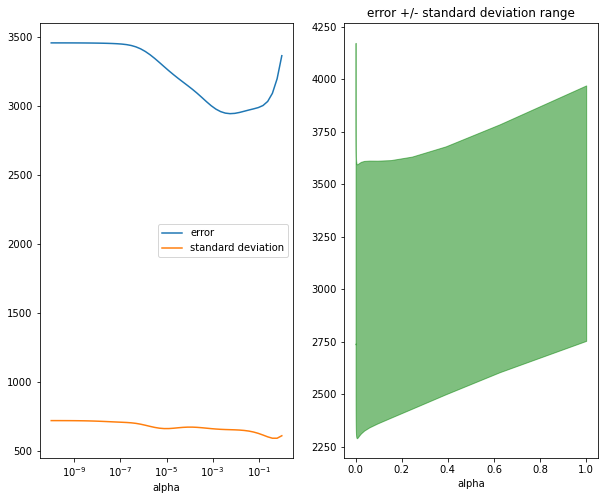

In [5]:
# your code here

#explore alphas for Ridge from 10^{-10} to 1 in logspace with 50 uniformly interpolated points (use np.logspace)
alphas = np.logspace(-10, 0, num=50)
scores_mean = []
scores_std = []
for alpha in alphas:
    #set up a pipeline of polynomial features (degree = 2) and Ridge (no scaling needed)
    polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=True)
    ridge = Ridge(alpha=alpha)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge", ridge)])
    pipeline.fit(X, y)
    #use 10-fold cross validation to find the best alpha
    score = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
    scores_mean.append(-np.mean(score))
    scores_std.append(np.std(score))

#plot the results on a semi-log scale, alphas in the log scale on x and cv mean and std error on the y-axis
ax = plt.subplot(1, 2, 1)
plt.semilogx(alphas, scores_mean, label = "error")
plt.semilogx(alphas, scores_std, label = "standard deviation")
plt.xlabel("alpha")
plt.legend(loc="best")

ax = plt.subplot(1, 2, 2)
plt.fill_between(alphas, np.array(scores_mean) - np.array(scores_std),
                     np.array(scores_mean) + np.array(scores_std), alpha=0.5,color="g")
plt.xlabel("alpha")
plt.title("error +/- standard deviation range")
plt.show()

From the plot on the left, we can see that the mean error and the standard deviation are the lowest around alpha = 10^-1.

In [6]:
def features_to_names(feature_names, features):
    """
    Replace the features returned by the model (x0, x1, x2, x1x2, etc.)
    by their actual names.
    """
    features_to_names = {}
    features_to_names["x0"] = "bias"
    for feat_idx in range(0, len(feature_names)):
        features_to_names[features[feat_idx+1]] = feature_names[feat_idx]
    result = []
    for feature in features:
        val = feature
        for key in features_to_names.keys():
            if(key in val):
                val = val.replace(key, features_to_names[key])
        result.append(val)
    return result

CV score of the best model =  2942.363801276751


<BarContainer object of 66 artists>

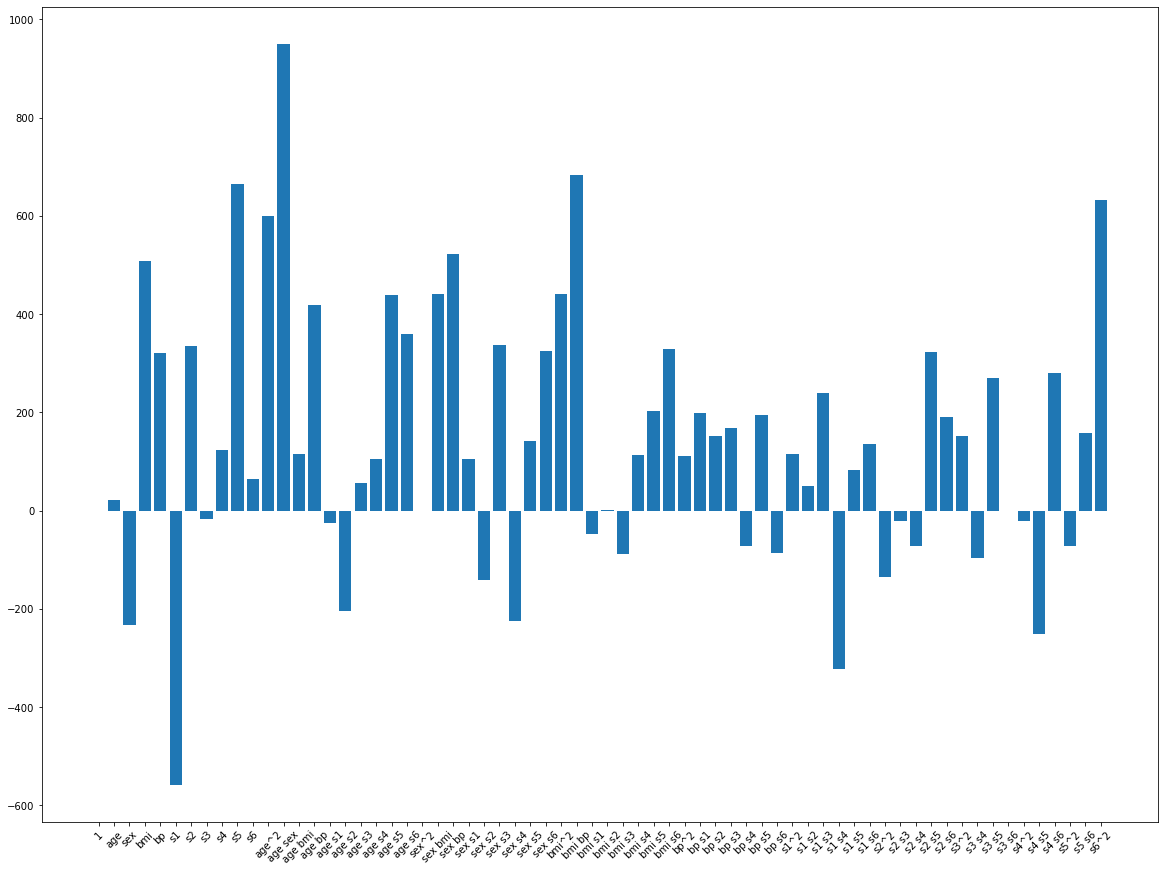

In [7]:
#build your final model with the best alpha
best_alpha = alphas[scores_mean.index(min(scores_mean))]
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=True)
ridge = Ridge(alpha=best_alpha)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge", ridge)])
pipeline.fit(X, y)
score = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
#report your CV score or error of your best model
print("CV score of the best model = ", -np.mean(score))

lin_model = pipeline.named_steps['ridge']
poly_features = pipeline.named_steps['polynomial_features']

#get the x-features into actual names
features_names = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
name_features = features_to_names(features_names, poly_features.get_feature_names())

#visualize the coefficients of your ridge model
plt.figure(figsize = (20,15))
plt.xticks(range(len(poly_features.get_feature_names())), rotation = 45)
plt.bar(name_features, lin_model.coef_)

# Build the best L1 regularized model for the diabetes dataset (20 points)
- load the diabetes data set
- set up a pipeline of Polynomial features (degree 2) and Lasso (**no scaling needed**)
- explore alphas for Lasso from 10^{-10} to 1 in logspace with 50 uniformly interpolated points (use np.logspace)
- use 10-fold cross validation to find the best alpha (use GridSearchCV in sklearn)
- plot the results on a semi-log scale, alphas in the log scale on x and cv mean and std error on the y-axis
- build your final model with the best alpha
- report your CV score or error of your best model
- visualize the coefficients of your lasso model

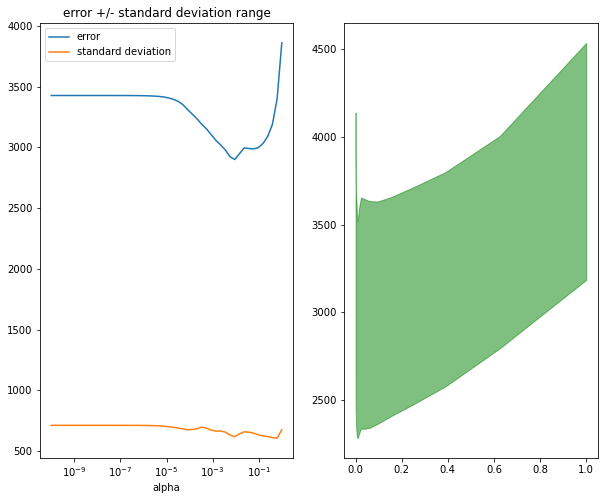

In [8]:
# your code here
# your code here
#set up a pipeline of polynomial features (degree = 2) and Ridge (no scaling needed)

#explore alphas for Lasso from 10^{-10} to 1 in logspace with 50 uniformly interpolated points (use np.logspace
alphas = np.logspace(-10, 0, num=50)
scores_mean = []
scores_std = []
for alpha in alphas:
    #set up a pipeline of Polynomial features (degree 2) and Lasso (no scaling needed)
    polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=True)
    lasso = Lasso(alpha=alpha)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("lasso", lasso)])
    pipeline.fit(X, y)
    #use 10-fold cross validation to find the best alpha 
    score = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
    scores_mean.append(-np.mean(score))
    scores_std.append(np.std(score))

#plot the results on a semi-log scale, alphas in the log scale on x and cv mean and std error on the y-axis
ax = plt.subplot(1, 2, 1)
plt.semilogx(alphas, scores_mean, label = "error")
plt.semilogx(alphas, scores_std, label = "standard deviation")
plt.xlabel("alpha")

plt.legend(loc="best")
plt.xlabel("alpha")
plt.title("error +/- standard deviation range")
ax = plt.subplot(1,2,2)
plt.fill_between(alphas, np.array(scores_mean) - np.array(scores_std),
                     np.array(scores_mean) + np.array(scores_std), alpha=0.5,color="g")
plt.show()

CV score of the best model =  2900.0612187855854


<BarContainer object of 66 artists>

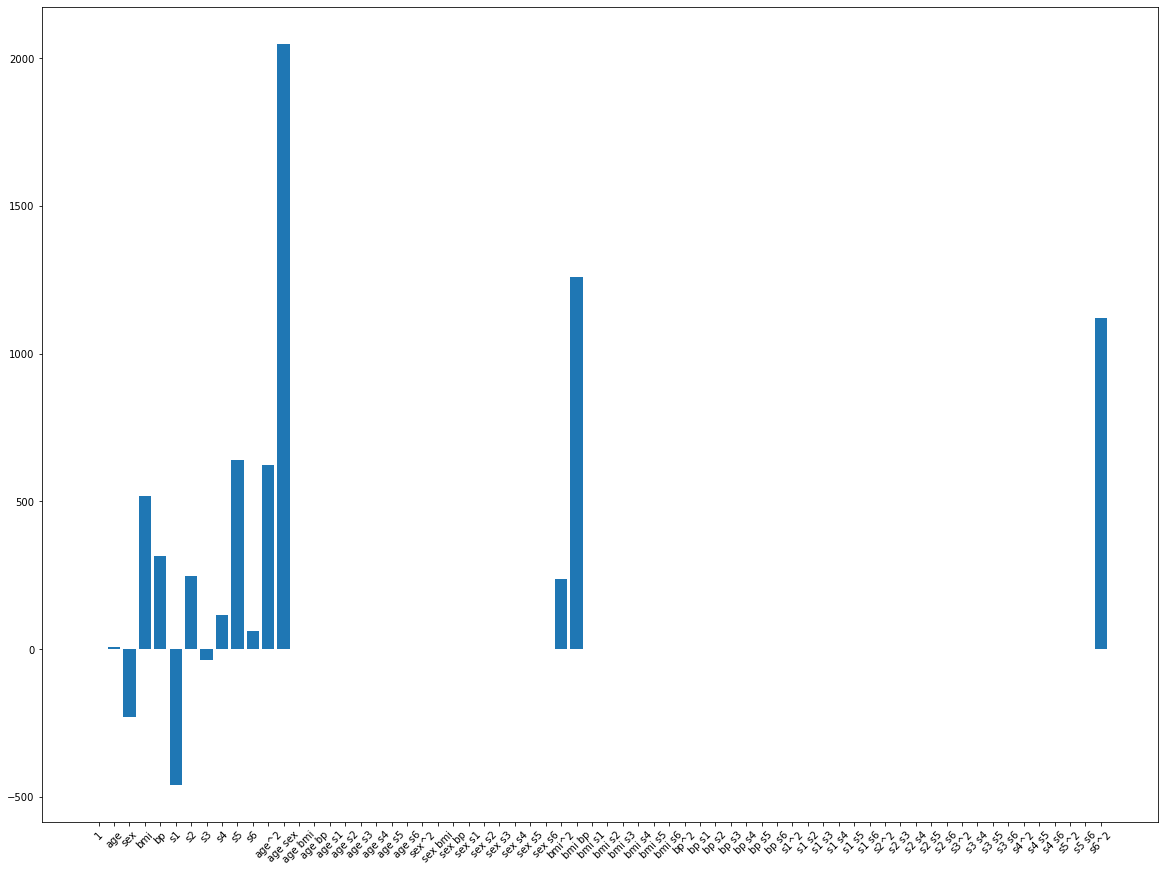

In [9]:
#build your final model with the best alpha
best_alpha = alphas[scores_mean.index(min(scores_mean))]
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=True)
lasso = Lasso(alpha=best_alpha)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("lasso", lasso)])
pipeline.fit(X, y)
score = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
#report your CV score or error of your best model
print("CV score of the best model = ", -np.mean(score))

lin_model = pipeline.named_steps['lasso']
poly_features = pipeline.named_steps['polynomial_features']

#get the x-features into actual names
features_names = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
name_features = features_to_names(features_names, poly_features.get_feature_names())

#visualize the coefficients of your lasso model
plt.figure(figsize = (20,15))
plt.xticks(range(len(poly_features.get_feature_names())), rotation = 45)
plt.bar(name_features, lin_model.coef_)

# Build the best decision tree model for the diabetes dataset (20 points)
- load the diabetes data set
- the DecisionTree regressor in sklearn has a max_depth parameter. Search over a range of depths from 1 to 10 to find the best value of this parameter. You can use GridSearchCV with this one parameter. Plot the cv mean and std for these 10 depths.
- use the best depth to build the final tree model on the data
- report your CV score of this best model
- visualize the feature importance of this tree

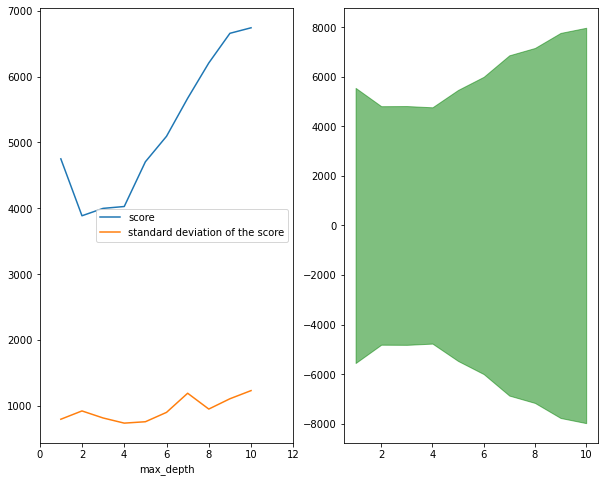

In [10]:
# your code here
clf = GridSearchCV(DecisionTreeRegressor(), {"max_depth":range(1,11)}, scoring = 'neg_mean_squared_error', cv = 10)
clf.fit(X, y)
,

#the DecisionTree regressor in sklearn has a max_depth parameter. 
#Search over a range of depths from 1 to 10 to find the best value of this parameter. You can use GridSearchCV with this one parameter.
scores_mean = -clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

#Plot the cv mean and std for these 10 depths.
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 11), scores_mean, label = "score")
plt.plot(range(1, 11), scores_std, label = "standard deviation of the score")
plt.xlabel("max_depth")
plt.xlim((0, 12))
plt.legend(loc="best")
ax = plt.subplot(1,2,2)
plt.fill_between(range(1, 11), np.array(-scores_mean) - np.array(scores_std),
                     np.array(scores_mean) + np.array(scores_std), alpha=0.5,color="g")

best_depth = clf.best_estimator_.get_params()['max_depth']



CV score of the best model(depth 2): 62.348295


<AxesSubplot:title={'center':'Feature Importance'}>

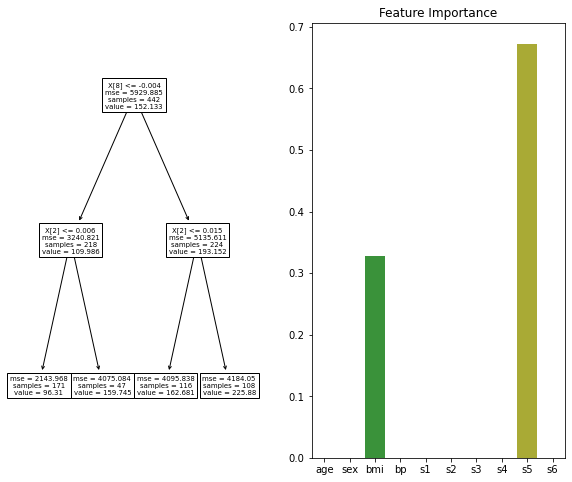

In [11]:
#use the best depth to build the final tree model on the data
reg = DecisionTreeRegressor(max_depth=best_depth)
reg.fit(X,y)
ax = plt.subplot(1, 2, 1)
plot_tree(reg);
#report your CV score of this best model
print("CV score of the best model(depth %i): %f"%(best_depth, np.sqrt(-clf.best_score_)))

#visualize the feature importance of this tree
features_names = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
ax = plt.subplot(1, 2, 2)
plt.title("Feature Importance")
sns.barplot(y = reg.feature_importances_, x = features_names)

# Build the best random forest model for the diabetes dataset (20 points)
- load the diabetes data set
- the RandomForest implementation in sklearn has two key parameters: n_estimators, max_depth. Search over a range of depths from 1 to 4, and trees from 5 to 50 in increments of 5 to find the best value of this parameter. You can use GridSearchCV with both parameters. 
- use the best depth and n_estimators to build the final forest model on the data
- report your CV score of this best model
- visualize the feature importance of this forest

In [12]:
# your code here
#the RandomForest implementation in sklearn has two key parameters: n_estimators, max_depth. 
#Search over a range of depths from 1 to 4, and trees from 5 to 50 in increments of 5 to find the best value of this parameter. 
#You can use GridSearchCV with both parameters.
clf = GridSearchCV(RandomForestRegressor(), {"max_depth":range(1,4+1), "n_estimators":range(5,50+1, 5)}, scoring = "neg_mean_squared_error", cv = 10)
clf.fit(X, y)

best_depth = clf.best_estimator_.max_depth
best_num_estimators = clf.best_estimator_.n_estimators

CV score of the best model with 4 max_depth and 15 trees in the ensemble: 56.779676


<AxesSubplot:title={'center':'Feature Importance'}>

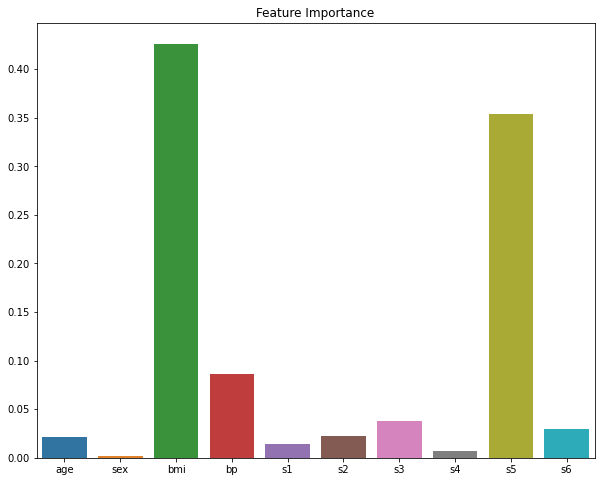

In [14]:
#use the best depth and n_estimators to build the final forest model on the data
reg = RandomForestRegressor(max_depth = best_depth, n_estimators = best_num_estimators)
reg.fit(X,y)
print("CV score of the best model with %i max_depth and %i trees in the ensemble: %f" %(best_depth, best_num_estimators, np.sqrt(-clf.best_score_)))
#visualize the feature importance of this forest
features_names = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
plt.title("Feature Importance")
sns.barplot(y = reg.feature_importances_, x = features_names)

# Comparing models (5 points)
- which model would you use to predict for brand new diabetes patients?
- Why?

All models do not peroform very well under the 10-fold test. Tthe linear regression models have mean errors of 54 for L2 and 53 for L1 (took the sqaure root of the MSE).

The results for the tree-like models were not very good too. However, the Random Forest Regressor model(sqrt(MSE) = 56.77) outpreformed the Decision Tree Regressor model (sqrt(MSE) = 62.34). Neverthelss, the models preformed poorly. Given these errors, I would choose the Random Forest Regressor model.

Finally, if we had to choose the best perofrming model accroding to the MSE, we would pick the L1 model with the lowest sqrt(MSE) of 53.
It's important to reiterate that all models are fairly bad at predicting brand new diabetes patients!!!